In [82]:
# Program by Kaliyev.A

import numpy as np # algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



dataset/american_sign_language.PNG
dataset/sign_mnist_test.csv
dataset/sign_mnist_train.csv
dataset/amer_sign3.png
dataset/amer_sign2.png
dataset/sign_mnist_train/sign_mnist_train.csv
dataset/sign_mnist_test/sign_mnist_test.csv


# Prep

In [83]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# dataprep

In [84]:
train_df = pd.read_csv('dataset/sign_mnist_train.csv')
test_df = pd.read_csv('dataset//sign_mnist_test.csv')

In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [86]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [87]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [88]:
train_label = train_df['label']
train_label.head()
trainset = train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [89]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [90]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [91]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

In [92]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [93]:
X_test = X_test.values.reshape(-1,28,28,1)

In [94]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


In [95]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test = X_test/255

# Visualization

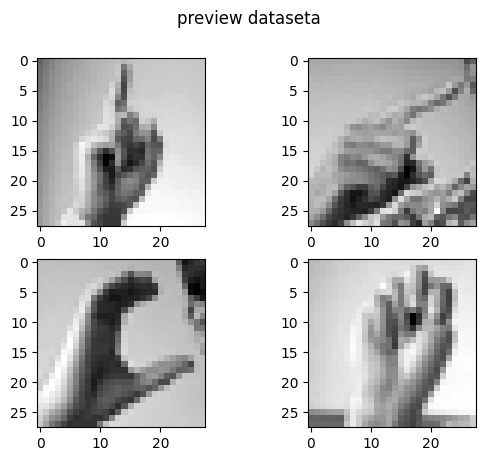

In [96]:
fig,axe = plt.subplots(2,2)
fig.suptitle('preview dataseta')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')

In [97]:
model = Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

In [98]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 4, 4, 32)         

In [99]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Training

In [100]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 10,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/10
138/138 [==============================] - 14s 97ms/step - loss: 2.9628 - accuracy: 0.1152 - val_loss: 2.3803 - val_accuracy: 0.2936
Epoch 2/10
138/138 [==============================] - 14s 98ms/step - loss: 2.1841 - accuracy: 0.3096 - val_loss: 1.4574 - val_accuracy: 0.5226
Epoch 3/10
138/138 [==============================] - 13s 95ms/step - loss: 1.6197 - accuracy: 0.4620 - val_loss: 1.0881 - val_accuracy: 0.6541
Epoch 4/10
138/138 [==============================] - 13s 97ms/step - loss: 1.2802 - accuracy: 0.5706 - val_loss: 0.8351 - val_accuracy: 0.7299
Epoch 5/10
138/138 [==============================] - 15s 111ms/step - loss: 1.0507 - accuracy: 0.6479 - val_loss: 0.6430 - val_accuracy: 0.7715
Epoch 6/10
138/138 [==============================] - 16s 115ms/step - loss: 0.8983 - accuracy: 0.6968 - val_loss: 0.6506 - val_accuracy: 0.7766
Epoch 7/10
138/138 [==============================] - 15s 108ms/step - loss: 0.7766 - accuracy: 0.7370 - val_loss: 0.5527 - val_accura

In [101]:
model.save('final.keras')  

## Evaluating, Tests

In [102]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 1s 5ms/step - loss: 0.2264 - accuracy: 0.9342


In [104]:
print(f'acc = {acc*100}%')

acc = 93.41884851455688%


In [105]:
import unittest

In [106]:
class TestDataLoading(unittest.TestCase):
    def test_train_df_shape(self):
        train_df = pd.read_csv('dataset/sign_mnist_train.csv')
        expected_shape = (27455, 785) 
        self.assertEqual(train_df.shape, expected_shape)

    def test_test_df_shape(self):
        test_df = pd.read_csv('dataset/sign_mnist_test.csv')
        expected_shape = (7172, 785)
        self.assertEqual(test_df.shape, expected_shape)



In [107]:
unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 1.083s

OK
